# Dealing with imbalanced dataset

Imbalanced Dataset

How to resolve?

       Upsampling
       
       Downsampling
       
       
Introduce KNeighbors Classifer

Model the data

Hyper parameter tuning using GridSearch CV

Find the model withe best parameters

Conclude

## Imbalanced data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bank=pd.read_csv('bank.csv')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
bank['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [4]:
5289/(5289+39922)

0.11698480458295547

Yes class >>>> 11.69

No class >>>> 88.31

## Resolving imbalance

### Upsampling

### Downsampling

In [5]:
bank_yes=bank[bank['y']=='yes']
bank_yes.shape

(5289, 17)

In [6]:
bank_no=bank[bank['y']=='no']
bank_no.shape

(39922, 17)

## Upsampling

Done on minority class

Increasing the no of data points

In [7]:
from sklearn.utils import resample

bank_yes_up=resample(bank_yes,replace=True,random_state=100,n_samples=20000)
bank_yes_up.shape

(20000, 17)

## Downsampling

Done on majority class

REduce the no of data points 

In [8]:
bank_no_down=resample(bank_no, replace= False, n_samples=30000, random_state=100)
bank_no_down.shape

(30000, 17)

## Creating new data set

In [9]:
bank_new=pd.concat([bank_no_down,bank_yes_up])
bank_new.shape

(50000, 17)

In [10]:
bank_new.head(25)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
9789,39,blue-collar,married,tertiary,no,10483,no,no,unknown,9,jun,218,1,-1,0,unknown,no
44899,77,retired,married,tertiary,no,0,no,no,cellular,27,sep,990,4,-1,0,unknown,no
2331,28,blue-collar,married,secondary,no,-95,yes,no,unknown,13,may,200,1,-1,0,unknown,no
15271,41,management,single,tertiary,no,0,yes,no,cellular,17,jul,509,7,-1,0,unknown,no
10642,38,services,divorced,secondary,no,439,no,no,unknown,16,jun,50,1,-1,0,unknown,no
31346,57,blue-collar,married,primary,no,1610,no,no,telephone,16,mar,147,1,-1,0,unknown,no
15867,41,blue-collar,married,secondary,yes,-750,yes,yes,cellular,21,jul,251,3,-1,0,unknown,no
24316,48,technician,married,secondary,no,32,yes,yes,cellular,17,nov,110,2,-1,0,unknown,no
2401,27,blue-collar,single,secondary,no,71,yes,no,unknown,13,may,174,1,-1,0,unknown,no
8299,47,admin.,married,primary,no,68,yes,no,unknown,2,jun,754,2,-1,0,unknown,no


In [11]:
bank_new.tail(25)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
31962,31,blue-collar,married,secondary,no,1406,yes,yes,cellular,13,apr,1091,2,-1,0,unknown,yes
39826,27,management,single,tertiary,no,1840,no,no,cellular,1,jun,220,1,28,8,other,yes
12491,37,technician,single,tertiary,no,0,no,no,unknown,1,jul,1135,2,-1,0,unknown,yes
3708,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown,yes
43386,47,management,married,tertiary,no,288,no,no,cellular,31,mar,193,1,181,1,success,yes
31630,42,management,single,tertiary,no,11891,no,no,cellular,6,apr,158,1,-1,0,unknown,yes
44441,45,blue-collar,single,secondary,no,0,no,no,cellular,5,aug,374,2,472,1,success,yes
16356,28,technician,single,tertiary,no,-123,no,yes,cellular,23,jul,690,1,-1,0,unknown,yes
43684,29,self-employed,single,tertiary,no,3290,no,no,cellular,12,may,430,1,50,3,success,yes
35269,35,management,single,tertiary,no,1618,yes,yes,cellular,7,may,542,1,-1,0,unknown,yes


## Shuffle the dataset

In [12]:
from sklearn. utils import shuffle

bank_new=shuffle(bank_new)
bank_new.head(25)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
26810,46,admin.,divorced,secondary,no,778,yes,no,cellular,20,nov,106,3,-1,0,unknown,no
43117,79,retired,divorced,primary,no,1910,no,no,telephone,24,feb,98,2,-1,0,unknown,no
40204,51,self-employed,married,unknown,no,2094,no,no,cellular,8,jun,458,6,-1,0,unknown,yes
45081,34,technician,single,secondary,no,1279,yes,no,cellular,21,oct,339,3,91,10,success,yes
19136,43,technician,divorced,secondary,no,-36,yes,no,cellular,5,aug,292,1,-1,0,unknown,no
1080,37,self-employed,married,primary,no,0,no,no,unknown,7,may,112,4,-1,0,unknown,no
10427,58,retired,married,primary,no,1761,no,no,unknown,12,jun,773,4,-1,0,unknown,no
8348,41,services,married,tertiary,no,412,yes,no,unknown,3,jun,154,5,-1,0,unknown,no
34081,31,admin.,married,secondary,no,35,no,no,cellular,30,apr,615,1,-1,0,unknown,yes
6474,28,blue-collar,single,unknown,no,913,yes,no,unknown,27,may,580,2,-1,0,unknown,no


## Splitting to target and features

In [14]:
y=bank_new['y']
y.shape

(50000,)

In [15]:
# Features
X=bank_new.drop(['y'],axis=1)
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
26810,46,admin.,divorced,secondary,no,778,yes,no,cellular,20,nov,106,3,-1,0,unknown
43117,79,retired,divorced,primary,no,1910,no,no,telephone,24,feb,98,2,-1,0,unknown
40204,51,self-employed,married,unknown,no,2094,no,no,cellular,8,jun,458,6,-1,0,unknown
45081,34,technician,single,secondary,no,1279,yes,no,cellular,21,oct,339,3,91,10,success
19136,43,technician,divorced,secondary,no,-36,yes,no,cellular,5,aug,292,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27378,30,student,single,tertiary,no,3300,no,no,cellular,21,nov,1571,1,-1,0,unknown
25164,41,self-employed,married,tertiary,no,6000,yes,no,cellular,18,nov,265,1,-1,0,unknown
40537,55,management,married,unknown,no,3122,no,no,cellular,8,jul,349,1,-1,0,unknown
14801,36,management,married,tertiary,no,64,no,no,cellular,16,jul,130,1,-1,0,unknown


## Converting categorical features to numeric



In [16]:
X_new=pd.get_dummies(X)
X_new

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
26810,46,778,20,106,3,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
43117,79,1910,24,98,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
40204,51,2094,8,458,6,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
45081,34,1279,21,339,3,91,10,0,0,0,...,0,0,0,0,1,0,0,0,1,0
19136,43,-36,5,292,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27378,30,3300,21,1571,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
25164,41,6000,18,265,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
40537,55,3122,8,349,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14801,36,64,16,130,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
X_new.shape

(50000, 51)

## Standardise the features

In [18]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_scaled=scaler.fit_transform(X_new)
X_scaled

array([[ 0.41315169, -0.2226383 ,  0.51806335, ..., -0.22003601,
        -0.29867368,  0.56111963],
       [ 3.24887878,  0.11909903,  0.99341843, ..., -0.22003601,
        -0.29867368,  0.56111963],
       [ 0.84280731,  0.17464644, -0.90800187, ..., -0.22003601,
        -0.29867368,  0.56111963],
       ...,
       [ 1.18653181,  0.48498741, -0.90800187, ..., -0.22003601,
        -0.29867368,  0.56111963],
       [-0.44615955, -0.4381864 ,  0.04270828, ..., -0.22003601,
        -0.29867368,  0.56111963],
       [ 0.15535832,  1.05132949, -0.19496926, ..., -0.22003601,
        -0.29867368,  0.56111963]])

## Splitting dataset to train and test

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test=train_test_split(X_scaled,y,test_size=0.2, random_state=100)

X_train.shape,X_test.shape, y_train.shape,y_test.shape

((40000, 51), (10000, 51), (40000,), (10000,))

## Building the model- K Nearest Neighbor Classifier

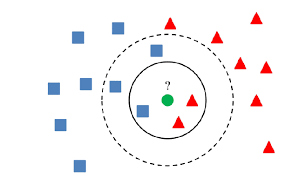

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

## Model Performance



In [21]:
from sklearn.metrics import confusion_matrix, classification_report,roc_curve, roc_auc_score

cm=confusion_matrix(y_test,knn.predict(X_test))
report=classification_report(y_test,knn.predict(X_test))

print(' CM:\n', cm)
print('Report:\n',report)

 CM:
 [[5059  824]
 [ 561 3556]]
Report:
               precision    recall  f1-score   support

          no       0.90      0.86      0.88      5883
         yes       0.81      0.86      0.84      4117

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## Hyper parameter tuning using GridSearchCV

In [22]:
from sklearn.model_selection import GridSearchCV

knn_gs=GridSearchCV(knn,{'n_neighbors':range(3,10)})

In [24]:
knn_gs.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 10)})

In [25]:
knn_gs.best_params_

{'n_neighbors': 3}

## Create the best model

In [26]:
knn_best=KNeighborsClassifier(n_neighbors=3)
knn_best.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
report=classification_report(y_test,knn_best.predict(X_test))


print(' The report of the best model:\n',report)

 The report of the best model:
               precision    recall  f1-score   support

          no       0.94      0.87      0.91      5883
         yes       0.84      0.92      0.88      4117

    accuracy                           0.89     10000
   macro avg       0.89      0.90      0.89     10000
weighted avg       0.90      0.89      0.90     10000

